In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sample-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4733434%2F8030742%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240706%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240706T184224Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D877b3dfcccebd7d8a563913779cfc90613e8567362b39cc6edb2c1c530d6a884a9dceabfb33cd434389faa535ff10d85e8ad4f755a862cbe6139b95abd919048b03905be5722b007522e0a2ee1bcfb5dc68a2beafde7b823d0e445aebd0cf153a2469435e42d4f6d5b576bd7201e2e4895a8b9e04f416a53f679908ed018bab9a6ffc5692376fe46999032aeb5c28222226806bb024b7bb71f5248c1a7dd8f19f876d780a25e863e769fbac14d6c6b750ed676510b078daef058f6559c150bdfc70db741b01445d448140856af4320a7e5f0f53ca803170b5186170701a3f5888a6330e40988f7f69fada2a8a67efa69d1cb344e1aa86987dd12486ea93b12d9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-data/Sample Data.csv


In [ ]:
import time
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

2024-04-21 20:34:08.072342: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 20:34:08.072479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 20:34:08.273431: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/kaggle/input/sample-data/Sample Data.csv')

In [ ]:
df.head()

,L,W,s,d,h,epsr,Resonant Freq
0,30,25,15,8,1.57,2.33,2.969
1,30,25,25,4,1.57,2.33,3.128
2,30,25,25,12,1.57,2.33,2.640
3,30,25,10,16,1.57,4.50,2.200
4,30,25,10,4,1.57,6.15,2.013


In [ ]:
# # Assuming df contains your data
# # X contains your input features, and y contains your output/target variable
# X = df[['L', 'W', 's', 'd', 'h', 'epsr']]
# y = df['Resonant Freq']

# # Perform PCA to reduce dimensions to 3D
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X)

# # Create a DataFrame with reduced dimensions
# df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# # Add output variable to the DataFrame
# df_pca['output'] = y

# # Plot the 3D scatter plot
# fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='output')
# fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   L              22 non-null     int64  
 1   W              22 non-null     int64  
 2   s              22 non-null     int64  
 3   d              22 non-null     int64  
 4   h              22 non-null     float64
 5   epsr           22 non-null     float64
 6   Resonant Freq  22 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.3 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [ ]:
x

,L,W,s,d,h,epsr
0,30,25,15,8,1.57,2.33
1,30,25,25,4,1.57,2.33
2,30,25,25,12,1.57,2.33
3,30,25,10,16,1.57,4.50
4,30,25,10,4,1.57,6.15
5,30,25,20,16,1.57,6.15
6,30,25,20,16,1.57,9.80
7,30,25,10,8,1.57,2.33
8,40,30,25,5,2.50,2.33
9,40,30,30,20,2.50,2.33


In [ ]:
y

0     2.969
1     3.128
2     2.640
3     2.200
4     2.013
5     1.563
6     1.244
7     3.130
8     2.359
9     1.844
10    1.713
11    1.650
12    1.432
13    1.183
14    1.090
15    1.904
16    1.635
17    1.380
18    1.303
19    1.114
20    0.983
21    2.680
Name: Resonant Freq, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=1)

In [ ]:
X_train

,L,W,s,d,h,epsr
17,50,35,35,6,3.17,4.50
6,30,25,20,16,1.57,9.80
7,30,25,10,8,1.57,2.33
1,30,25,25,4,1.57,2.33
14,40,30,20,15,2.50,9.80
0,30,25,15,8,1.57,2.33
21,50,45,22,20,8.00,1.07
20,50,35,45,24,3.17,6.15
9,40,30,30,20,2.50,2.33
8,40,30,25,5,2.50,2.33


In [ ]:
X_test

,L,W,s,d,h,epsr
19,50,35,35,12,3.17,6.15
16,50,35,35,18,3.17,2.33
3,30,25,10,16,1.57,4.50
13,40,30,30,20,2.50,6.15
18,50,35,40,12,3.17,4.50
15,50,35,30,6,3.17,2.33
10,40,30,25,5,2.50,4.50
4,30,25,10,4,1.57,6.15
2,30,25,25,12,1.57,2.33


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# from sklearn.preprocessing import PolynomialFeatures

# poly_features = PolynomialFeatures(degree=2)

# X_train_poly = poly_features.fit_transform(X_train)
# X_test_poly = poly_features.transform(X_test)

In [ ]:
# X_train_poly

In [ ]:
# Model Comparisons (Based on Activation funcitons)

# Relu
model1 = Sequential()

model1.add(Dense(6, activation='relu', input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model1.add(Dense(6, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# model.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='linear'))

# Sigmoid
model2 = Sequential()

model2.add(Dense(6, activation='sigmoid', input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model2.add(Dense(6, activation='sigmoid', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation='linear'))

# tanh
model3 = Sequential()

model3.add(Dense(6, activation='tanh', input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model3.add(Dense(6, activation='tanh', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model3.add(Dense(1, activation='linear'))

#  Leaky Relu
from tensorflow.keras.layers import LeakyReLU

model4 = Sequential()

model4.add(Dense(6, activation=LeakyReLU(negative_slope=0.3), input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model4.add(Dense(6, activation=LeakyReLU(negative_slope=0.3), kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model4.add(Dense(1, activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model Comparisons (Based on hidden nodes)

# Relu
model1 = Sequential()
model1.add(Dense(6, activation='relu', input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model1.add(Dense(6, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# model.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='linear'))

model2 = Sequential()
model2.add(Dense(6, activation='relu', input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model2.add(Dense(3, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation='linear'))

model3 = Sequential()
model3.add(Dense(8, activation='relu', input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model3.add(Dense(4, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# model.add(Dense(4, activation='relu'))
model3.add(Dense(1, activation='linear'))

model4 = Sequential()
model4.add(Dense(5, activation='relu', input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model4.add(Dense(7, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# model.add(Dense(4, activation='relu'))
model4.add(Dense(1, activation='linear'))

model5 = Sequential()
model5.add(Dense(3, activation='relu', input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model5.add(Dense(3, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# model.add(Dense(4, activation='relu'))
model5.add(Dense(1, activation='linear'))

model6 = Sequential()
model6.add(Dense(4, activation='relu', input_dim=6, kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model6.add(Dense(6, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
# model.add(Dense(4, activation='relu'))
model6.add(Dense(1, activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()
model2.summary()
model3.summary()
model4.summary()
model5.summary()
model6.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85 (340.00 B)

 Trainable params: 85 (340.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (148.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam1 = Adam(learning_rate= 0.01)
adam2 = Adam(learning_rate= 0.01)
adam3 = Adam(learning_rate= 0.01)
adam4 = Adam(learning_rate= 0.01)
adam5 = Adam(learning_rate= 0.01)
adam6 = Adam(learning_rate= 0.01)
model1.compile(loss='mean_squared_error', optimizer = adam1, metrics=['mse'])
model2.compile(loss='mean_squared_error', optimizer = adam2, metrics=['mse'])
model3.compile(loss='mean_squared_error', optimizer = adam3, metrics=['mse'])
model4.compile(loss='mean_squared_error', optimizer = adam4, metrics=['mse'])
model5.compile(loss='mean_squared_error', optimizer = adam5, metrics=['mse'])
model6.compile(loss='mean_squared_error', optimizer = adam6, metrics=['mse'])

In [ ]:
start_time = time.time()
history1 = model1.fit(X_train, y_train, epochs=250, validation_split=0.4, verbose=0)
train_time = time.time() - start_time
print("Training Time:", train_time, "seconds")

Training Time: 14.870463609695435 seconds


In [ ]:
history2 = model2.fit(X_train, y_train, epochs=250, validation_split=0.4, verbose=0)

In [ ]:
history3 = model3.fit(X_train, y_train, epochs=250, validation_split=0.4, verbose=0)

In [ ]:
history4 = model4.fit(X_train, y_train, epochs=250, validation_split=0.4, verbose=0)

In [ ]:
history5 = model5.fit(X_train, y_train, epochs=250, validation_split=0.4, verbose=0)

In [ ]:
history6 = model6.fit(X_train, y_train, epochs=250, validation_split=0.4, verbose=0)

In [ ]:
X_test

,L,W,s,d,h,epsr
19,50,35,35,12,3.17,6.15
16,50,35,35,18,3.17,2.33
3,30,25,10,16,1.57,4.50
13,40,30,30,20,2.50,6.15
18,50,35,40,12,3.17,4.50
15,50,35,30,6,3.17,2.33
10,40,30,25,5,2.50,4.50
4,30,25,10,4,1.57,6.15
2,30,25,25,12,1.57,2.33


In [ ]:
#Model Evaluation

# Model 1
_, train_mse = model1.evaluate(X_train, y_train, verbose = 0)
_, test_mse = model1.evaluate(X_test, y_test, verbose = 0)
print('Model 1 -> Train: {}, Test: {}'.format(train_mse, test_mse))

# Model 2
_, train_mse = model2.evaluate(X_train, y_train, verbose = 0)
_, test_mse = model2.evaluate(X_test, y_test, verbose = 0)
print('Model 2 -> Train: {}, Test: {}'.format(train_mse, test_mse))

# Model 3
_, train_mse = model3.evaluate(X_train, y_train, verbose = 0)
_, test_mse = model3.evaluate(X_test, y_test, verbose = 0)
print('Model 3 -> Train: {}, Test: {}'.format(train_mse, test_mse))

# Model 4
_, train_mse = model4.evaluate(X_train, y_train, verbose = 0)
_, test_mse = model4.evaluate(X_test, y_test, verbose = 0)
print('Model 4 -> Train: {}, Test: {}'.format(train_mse, test_mse))

# Model 5
_, train_mse = model5.evaluate(X_train, y_train, verbose = 0)
_, test_mse = model5.evaluate(X_test, y_test, verbose = 0)
print('Model 5 -> Train: {}, Test: {}'.format(train_mse, test_mse))

# # Model 6
_, train_mse = model6.evaluate(X_train, y_train, verbose = 0)
_, test_mse = model6.evaluate(X_test, y_test, verbose = 0)
print('Model 6 -> Train: {}, Test: {}'.format(train_mse, test_mse))

Model 1 -> Train: 0.31881535053253174, Test: 0.6490452289581299
Model 2 -> Train: 0.5520265102386475, Test: 0.748370885848999
Model 3 -> Train: 1.2836384773254395, Test: 0.617428719997406
Model 4 -> Train: 0.6149340271949768, Test: 0.9335139393806458
Model 5 -> Train: 0.07194701582193375, Test: 0.17607493698596954
Model 6 -> Train: 0.13842922449111938, Test: 0.47338977456092834


In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
from sklearn.metrics import r2_score

rscores = []
for y_pred in [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]:
    r2 = r2_score(y_test, y_pred)
    rscores.append(r2)

rscores_arr = np.array(rscores)

rscores_df = pd.DataFrame({'R2 Score': rscores_arr})

print(rscores_df)

# r2_score(y_test, y_pred1)
# r2_score(y_test, y_pred2)
# r2_score(y_test, y_pred3)
# r2_score(y_test, y_pred4)

   R2 Score
0 -1.880878
1 -2.321749
2 -1.740544
3 -3.143533
4  0.218467
5 -1.101207


In [ ]:
import matplotlib.pyplot as plt


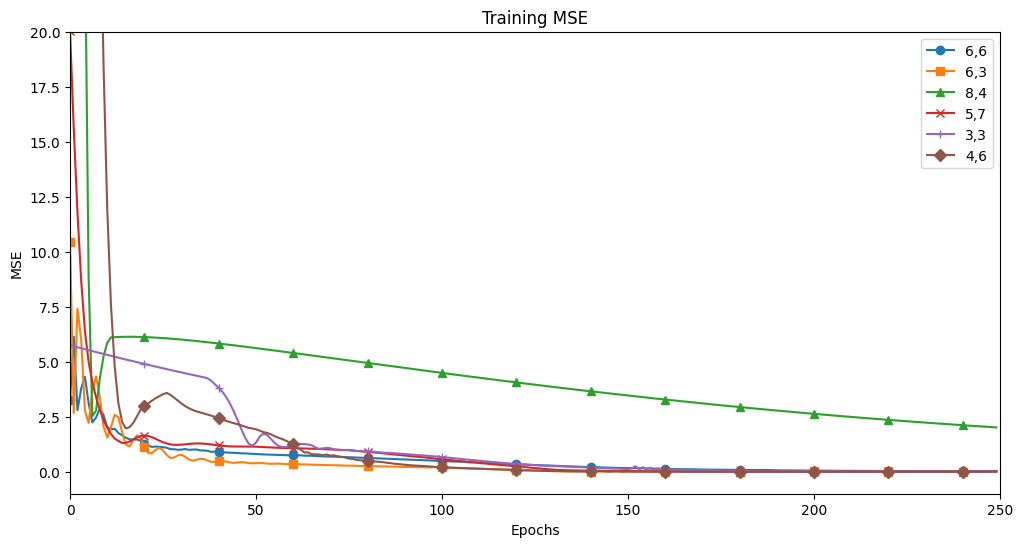

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

marker_interval = 20
# ax.plot(history1.history['mse'], label='Relu', markevery=marker_interval, marker='o')
# ax.plot(history2.history['mse'], label='Sigmoid', markevery=marker_interval, marker='s')
# ax.plot(history3.history['mse'], label='tanh', markevery=marker_interval, marker='^')
# ax.plot(history4.history['mse'], label='Leaky Relu', markevery=marker_interval, marker='x')

ax.plot(history1.history['mse'], label='6,6', markevery=marker_interval, marker='o')
ax.plot(history2.history['mse'], label='6,3', markevery=marker_interval, marker='s')
ax.plot(history3.history['mse'], label='8,4', markevery=marker_interval, marker='^')
ax.plot(history4.history['mse'], label='5,7', markevery=marker_interval, marker='x')
ax.plot(history5.history['mse'], label='3,3', markevery=marker_interval, marker='+')
ax.plot(history6.history['mse'], label='4,6', markevery=marker_interval, marker='D')

ax.set_ylim(-1, 20)
ax.set_xlim(0, 250)

ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax.set_title('Training MSE')
ax.legend()

plt.show()

# plt.plot(history1.history['mse'], label='Training MSE')
# plt.plot(history2.history['mse'], label='Training MSE')
# plt.plot(history3.history['mse'], label='Training MSE')

# plt.plot(history.history['val_mse'], label='Validation MSE')
# plt.xlabel('epochs')
# plt.ylabel('MSE')
# plt.legend()
# plt.show()

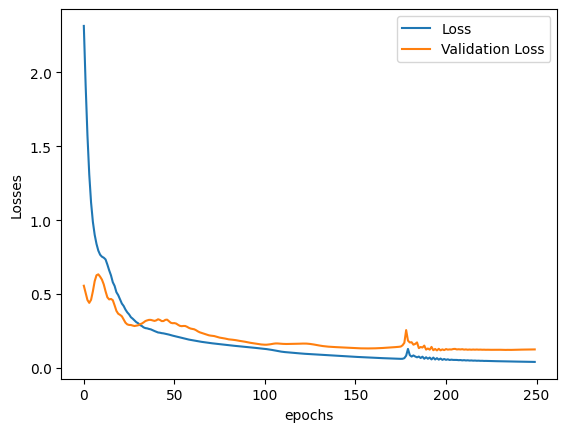

In [ ]:
plt.plot(history6.history['loss'], label='Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

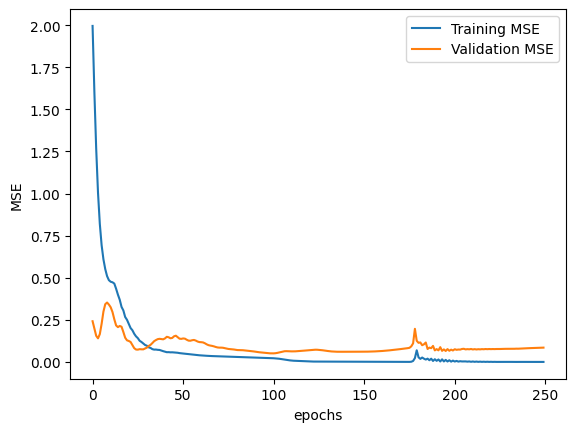

In [ ]:
plt.plot(history6.history['mse'], label='Training MSE')
plt.plot(history6.history['val_mse'], label='Validation MSE')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()